<a href="https://colab.research.google.com/github/Kaushikbejju225/Forest_Fire_Detection_using_NLP/blob/main/Forest_Fire_Detection_using_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("elmadafri/the-wildfire-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/the-wildfire-dataset


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input

In [ ]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
if len(physical_devices) > 0:
  tf.config.experimental.set_memory_growth(physical_devices[0], True)
  print('GPU is Available!')
else:
  print('GPU is Unavailable!')

GPU is Available!


In [ ]:
train_dir = '/kaggle/input/the-wildfire-datasetthe_wildfire_dataset_2n_version/train'
val_dir = '/kaggle/input/the-wildfire-datasetthe_wildfire_dataset_2n_version/val'
test_dir = '/kaggle/input/the-wildfire-datasetthe_wildfire_dataset_2n_version/test'

In [ ]:
train_dir="/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/train"
test_dir="/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/test"
val_dir="/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/val"

In [ ]:
# List all the classes
classes = os.listdir(train_dir)
num_classes = len(classes)

# Display the class names
print(f'Number of Classes: {num_classes}')
print(f'Classes: {classes}')

Number of Classes: 2
Classes: ['nofire', 'fire']


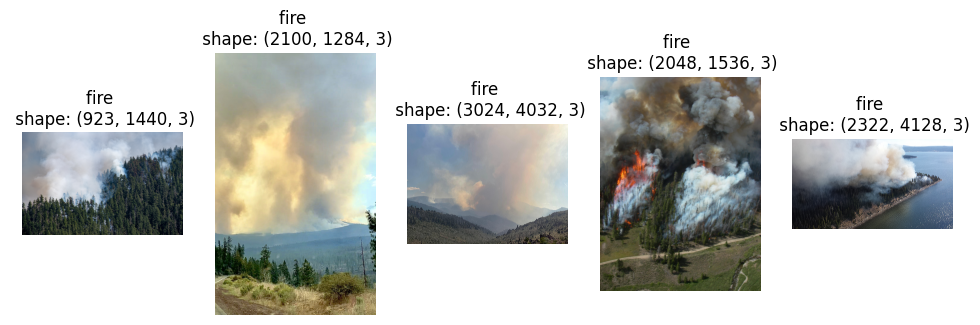

In [ ]:
import os
import matplotlib.pyplot as plt

# Let's visualize the images in the dataset
plt.figure(figsize=(12, 10))
for i in range(5):
    class_path = os.path.join(train_dir, classes[1])  # Assuming classes[1] is 'fire'
    img_name = os.listdir(class_path)[i]
    img_path = os.path.join(class_path, img_name)
    img = plt.imread(img_path)

    plt.subplot(1, 5, i+1)
    plt.imshow(img)
    plt.title(f'{classes[1]} \n shape: {img.shape}')
    plt.axis('off')

plt.show()


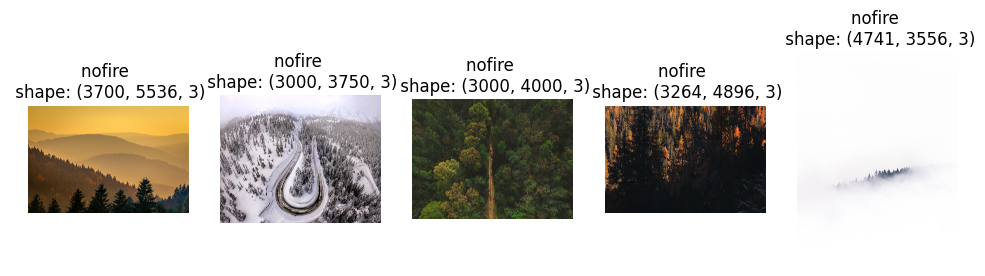

In [ ]:
# Let's visualize the images in the dataset
plt.figure(figsize=(12, 10))
for i in range(5):
  class_path = os.path.join(train_dir, classes[0])
  img_name = os.listdir(class_path)[i]
  img_path = os.path.join(class_path, img_name)
  img = plt.imread(img_path)

  plt.subplot(1, 5, i+1)
  plt.imshow(img)
  plt.title(f'{classes[0]} \n shape: {img.shape}')
  plt.axis('off')
plt.show()

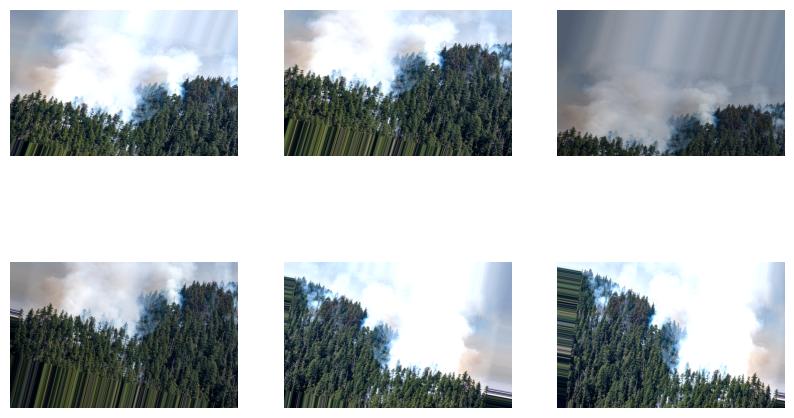

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=30,  # Rotate images up to 30 degrees
    width_shift_range=0.2,  # Horizontal shift
    height_shift_range=0.2,  # Vertical shift
    shear_range=0.2,  # Shearing transformation
    zoom_range=0.2,  # Zoom in/out
    horizontal_flip=True,  # Flip images horizontally
    brightness_range=[0.5, 1.5],  # Adjust brightness
    fill_mode='nearest'  # Fill missing pixels
)

# Load and apply augmentation to a sample image
img_path = os.path.join(train_dir, classes[1], os.listdir(os.path.join(train_dir, classes[1]))[0])
img = tf.keras.preprocessing.image.load_img(img_path)
x = tf.keras.preprocessing.image.img_to_array(img)
x = np.expand_dims(x, axis=0)

plt.figure(figsize=(10, 6))
i = 1
for batch in datagen.flow(x, batch_size=1):
    plt.subplot(2, 3, i)
    plt.imshow(batch[0].astype('uint8'))
    plt.axis('off')
    i += 1
    if i > 6:  # Show 6 augmented images
        break
plt.show()


In [ ]:
img_width, img_height = 150, 150
batch_size = 32

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (img_width, img_height),
    batch_size = batch_size,
    class_mode = 'binary',
    shuffle = True
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size = (img_width, img_height),
    batch_size = batch_size,
    class_mode = 'binary',
    shuffle = True
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (img_width, img_height),
    batch_size = batch_size,
    class_mode = 'binary',
    shuffle = True
)

Found 1887 images belonging to 2 classes.
Found 402 images belonging to 2 classes.
Found 410 images belonging to 2 classes.


In [ ]:
class_mapping = train_generator.class_indices
class_names = list(class_mapping.keys())
print("Class Names:", class_names)

Class Names: ['fire', 'nofire']


In [ ]:
model = Sequential([
    Input(shape=(img_width, img_height, 3)),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
]
)